In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
tr=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/COMPILADO/halosprop1_R.dat')
ts=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/COMPILADO/halosprop1_S.dat')
masa_dm=0.09328805
masa_gs=0.018172996
inr, = np.where(tr[:,0]<13)
ins, = np.where(ts[:,0]<10)
outs,= np.where((ts[:,0]<30) & (ts[:,0]>25 ))
outr,= np.where((tr[:,0]<30) & (tr[:,0]>25 ))

APLICO LOS FILTROS DE RESOLUCION EN GAS

In [3]:
gs_r, = np.where((tr[:,6]>56) & (tr[:,8]>0))
gs_s, = np.where((ts[:,6]>56)  & (ts[:,8]>0))

In [4]:
dist_r    = tr[gs_r,0]
dist_s    = ts[gs_s,0]
frac_bar_r = ((tr[gs_r,6]+tr[gs_r,8])*masa_gs)/(tr[gs_r,7]*masa_dm)
frac_bar_s = ((ts[gs_s,6]+ts[gs_s,8])*masa_gs)/(ts[gs_s,7]*masa_dm)

frac_gs_r = ((tr[gs_r,6])*masa_gs)/(tr[gs_r,7]*masa_dm)
frac_gs_s = ((ts[gs_s,6])*masa_gs)/(ts[gs_s,7]*masa_dm)

frac_st_r = ((tr[gs_r,8])*masa_gs)/(tr[gs_r,6]*masa_gs)
frac_st_s = ((ts[gs_s,8])*masa_gs)/(ts[gs_s,6]*masa_gs)

In [7]:
abin=2
bines=np.arange(2,30,abin)
xr=[]; dxr=[]; yr=[]; dyr=[]; yr1=[]; dyr1=[]; zr=[]; dzr=[]
xs=[]; dxs=[]; ys=[]; dys=[]; ys1=[]; dys1=[]; zs=[]; dzs=[]

for i in bines:
    rango_r, = np.where((dist_r > i) & (dist_r < i + abin))
    yr.append(np.mean(frac_gs_r[rango_r]))
    dyr.append(np.std(frac_gs_r[rango_r])/np.sqrt(len(frac_gs_r[rango_r])))
    yr1.append(np.mean(frac_bar_r[rango_r]))
    dyr1.append(np.std(frac_bar_r[rango_r])/np.sqrt(len(frac_bar_r[rango_r])))
    xr.append(np.mean(dist_r[rango_r]))
    dxr.append(np.std(dist_r[rango_r]))
    zr.append(np.mean(frac_st_r[rango_r]))
    dzr.append(np.std(frac_st_r[rango_r])/np.sqrt(len(frac_st_r[rango_r])))
    
    
    rango_s, = np.where((dist_s > i) & (dist_s < i + abin))
    ys.append(np.mean(frac_gs_s[rango_s]))
    dys.append(np.std(frac_gs_s[rango_s])/np.sqrt(len(frac_gs_s[rango_s])))
    xs.append(np.mean(dist_s[rango_s]))
    dxs.append(np.std(dist_s[rango_s]))
    ys1.append(np.mean(frac_bar_s[rango_s]))
    dys1.append(np.std(frac_bar_s[rango_s])/np.sqrt(len(frac_bar_s[rango_s])))
    zs.append(np.mean(frac_st_s[rango_s]))
    dzs.append(np.std(frac_st_s[rango_s])/np.sqrt(len(frac_st_s[rango_s])))
    
yr=np.array(yr)
dry=np.array(dyr)
yr1=np.array(yr1)
dry1=np.array(dyr1)
xr=np.array(xr)
dxr=np.array(dxr)
zr=np.array(zr)
dzr=np.array(dzr)

ys=np.array(ys)
drs=np.array(dys)
ys1=np.array(ys1)
drs1=np.array(dys1)
xs=np.array(xs)
dxs=np.array(dxs)
zs=np.array(zs)
dzs=np.array(dzs)

/home/arodriguez/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/arodriguez/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/arodriguez/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/arodriguez/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/arodriguez/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


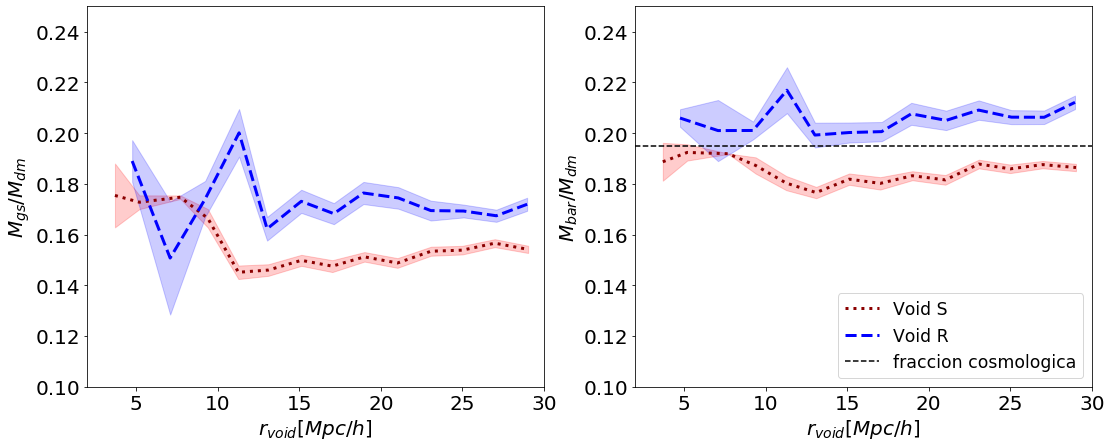

In [11]:
matplotlib.rc('xtick', labelsize=20)     
matplotlib.rc('ytick', labelsize=20)
axis_font = {'fontname':'Arial', 'size':'20'}

plt.figure(figsize=(18,7))
plt.subplot(121)
plt.plot(xs,ys,color='darkred',label='Void S',ls='dotted', lw=3)
plt.fill_between(xs, ys - dys, ys + dys,color='red',alpha=0.2)

plt.plot(xr,yr,color='blue',label='Void R',ls='--',lw=3)
plt.fill_between(xr, yr - dyr, yr + dyr,color='blue', alpha=0.2)


plt.ylabel('$M_{gs}/M_{dm}$', **axis_font)
plt.xlabel('$r_{void} [Mpc/h]$', **axis_font)
plt.ylim(0.10,0.25)
plt.xlim(2,30)

#plt.legend(fontsize='x-large')

################################################################3

plt.subplot(122)
plt.plot(xs,ys1,color='darkred',label='Void S',ls='dotted',lw=3)
plt.fill_between(xs, ys1 - dys1, ys1 + dys1,color='red', alpha=0.2)

plt.plot(xr,yr1,color='blue',label='Void R',ls='--',lw=3)
plt.fill_between(xr, yr1 - dyr1, yr1 + dyr1,color='blue', alpha=0.2)
plt.hlines(y=masa_gs/masa_dm,xmin=0,xmax=30,ls='--',label='fraccion cosmologica')
plt.ylabel('$M_{bar}/M_{dm}$', **axis_font)
plt.xlabel('$r_{void} [Mpc/h]$', **axis_font)

plt.ylim(0.10,0.25)
plt.xlim(2,30)
plt.legend(fontsize='xx-large',loc='lower right')

plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/SeleccionGraficos/FraccionPerfil.pdf',format='pdf')

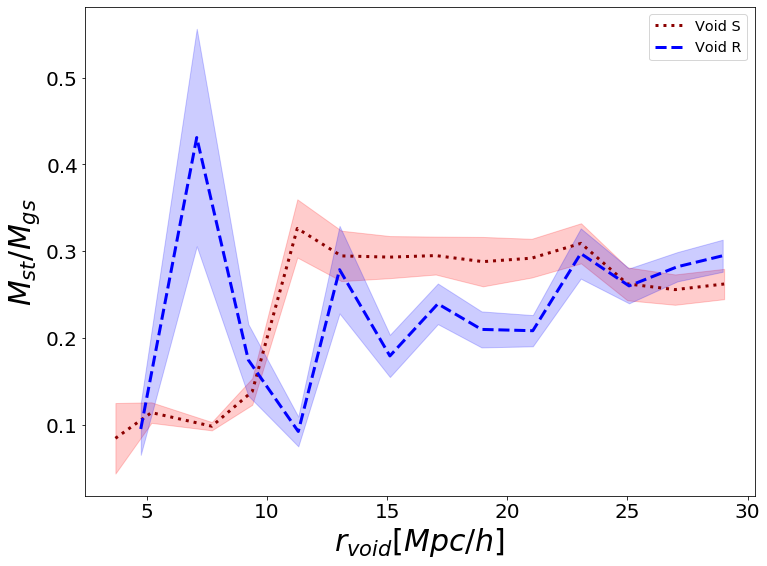

In [10]:
matplotlib.rc('xtick', labelsize=20)     
matplotlib.rc('ytick', labelsize=20)
axis_font = {'fontname':'Arial', 'size':'30'}
plt.figure(figsize=(12,9))
plt.plot(xs,zs,color='darkred',label='Void S',ls='dotted',lw='3')
plt.fill_between(xs, zs - dzs, zs + dzs,color='red' ,alpha=0.2)

plt.plot(xr,zr,color='blue',label='Void R',ls='--',lw=3)
plt.fill_between(xr, zr - dzr, zr + dzr,color='blue', alpha=0.2)

plt.ylabel('$M_{st}/M_{gs}$', **axis_font)
plt.xlabel('$r_{void} [Mpc/h]$', **axis_font)

plt.legend(fontsize='x-large')
plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/SeleccionGraficos/FraccionPerfil_barionic.pdf',format='pdf')

In [229]:
gs_r, = np.where((tr[:,6]>1) & (tr[:,8]>0) )
gs_s, = np.where((ts[:,6]>1)& (ts[:,8]>0) )

inr, = np.where(tr[gs_r,0]<13)
ins, = np.where(ts[gs_s,0]<10)
outs,= np.where((ts[gs_s,0]<30) & (ts[gs_s,0]>25 ))
outr,= np.where((tr[gs_r,0]<30) & (tr[gs_r,0]>25 ))

In [230]:
Mdm_inr=np.log10(tr[gs_r,7][inr]*masa_dm*1e10)
Mdm_ins=np.log10(ts[gs_s,7][ins]*masa_dm*1e10)
Mgs_inr=np.log10(tr[gs_r,6][inr]*masa_gs*1e10)
Mgs_ins=np.log10(ts[gs_s,6][ins]*masa_gs*1e10)
Mst_inr=np.log10(tr[gs_r,8][inr]*masa_gs*1e10)
Mst_ins=np.log10(ts[gs_s,8][ins]*masa_gs*1e10)

Mdm_outr=np.log10(tr[gs_r,7][outr]*masa_dm*1e10)
Mdm_outs=np.log10(ts[gs_s,7][outs]*masa_dm*1e10)
Mgs_outr=np.log10(tr[gs_r,6][outr]*masa_gs*1e10)
Mgs_outs=np.log10(ts[gs_s,6][outs]*masa_gs*1e10)
Mst_outr=np.log10(tr[gs_r,8][outr]*masa_gs*1e10)
Mst_outs=np.log10(ts[gs_s,8][outs]*masa_gs*1e10)

Mdm_OUT=np.append(Mdm_outr,Mdm_outs)
Mgs_OUT=np.append(Mgs_outr,Mgs_outs)
Mst_OUT=np.append(Mst_outr,Mst_outs)

In [225]:
len(Mdm_ins)

67

In [231]:
xbines = np.arange(11,15,.5)
xr=[]; xs=[]
yr=[]; ys=[]
zr=[]; zs=[]
x=[]; dx=[]
y=[]; dy=[]
z=[]; dz=[]
dxr=[]; dxs=[]
dyr=[]; dys=[]
dzr=[]; dzs=[]
dv=[]
for i in xbines:
    rango_inr, = np.where(( Mdm_inr> i) & (Mdm_inr < i + .5))
    rango_ins, = np.where(( Mdm_ins> i) & (Mdm_ins < i + .5))
    rango_out, = np.where(( Mdm_OUT> i) & (Mdm_OUT < i + .5))

    xr.append(np.mean(10**Mdm_inr[rango_inr]))
    dxr.append(np.std(10**Mdm_inr[rango_inr]))
    xs.append(np.mean(10**Mdm_ins[rango_ins]))
    dxs.append(np.std(10**Mdm_ins[rango_ins]))
    
    yr.append(np.mean(10**Mgs_inr[rango_inr]))
    dyr.append(np.std(10**Mgs_inr[rango_inr]))
    ys.append(np.mean(10**Mgs_ins[rango_ins]))
    dys.append(np.std(10**Mgs_ins[rango_ins]))
    
    zr.append(np.mean(10**Mst_inr[rango_inr]))
    dzr.append(np.std(10**Mst_inr[rango_inr]))
    zs.append(np.mean(10**Mst_ins[rango_ins]))
    dzs.append(np.std(10**Mst_ins[rango_ins]))
    
    x.append(np.mean(10**Mdm_OUT[rango_out]))
    dx.append(np.std(10**Mdm_OUT[rango_out]))
    y.append(np.mean(10**Mgs_OUT[rango_out]))
    dy.append(np.std(10**Mgs_OUT[rango_out]))
    z.append(np.mean(10**Mst_OUT[rango_out]))
    dz.append(np.std(10**Mst_OUT[rango_out]))

x=np.array(x)
dx=np.array(dx)
y=np.array(y)
dy=np.array(dy)
z=np.array(z)
dz=np.array(dz)

xr=np.array(xr)
dxr=np.array(dxr)
yr=np.array(yr)
dyr=np.array(dyr)
zr=np.array(zr)
dzr=np.array(dzr)
xs=np.array(xs)
dxs=np.array(dxs)
ys=np.array(ys)
dys=np.array(dys)
zs=np.array(zs)
dzs=np.array(dzs)


/home/arodriguez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log10
/home/arodriguez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log10
/home/arodriguez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log10
/home/arodriguez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in log10


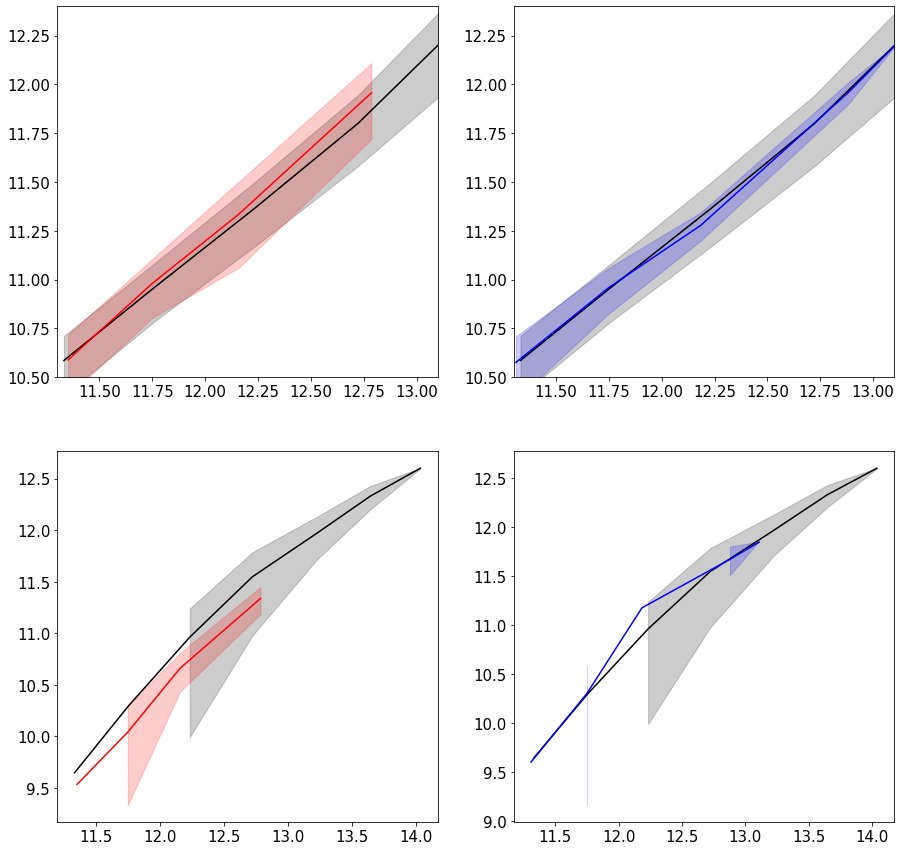

In [232]:
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.plot(np.log10(x),np.log10(y),color='black')
plt.fill_between(np.log10(x), np.log10(y - dy),np.log10( y + dy),color='black', alpha=0.2)


plt.plot(np.log10(xs),np.log10(ys),color='red')
plt.fill_between(np.log10(xs), np.log10(ys - dys),np.log10( ys + dys),color='red', alpha=0.2)


plt.xlim(11.3,13.1)
plt.ylim(10.5,12.4)

plt.subplot(222)
plt.plot(np.log10(x),np.log10(y),color='black')
plt.fill_between(np.log10(x), np.log10(y - dy),np.log10( y + dy),color='black', alpha=0.2)


plt.plot(np.log10(xr),np.log10(yr),color='blue')
plt.fill_between(np.log10(xr), np.log10(yr - dyr),np.log10( yr + dyr),color='blue', alpha=0.2)


plt.xlim(11.3,13.1)
plt.ylim(10.5,12.4)

plt.subplot(223)
plt.plot(np.log10(x),np.log10(z),color='black')
plt.fill_between(np.log10(x), np.log10(z - dz),np.log10( z + dz),color='black', alpha=0.2)


plt.plot(np.log10(xs),np.log10(zs),color='red')
plt.fill_between(np.log10(xs), np.log10(zs - dzs),np.log10( zs + dzs),color='red', alpha=0.2)



plt.subplot(224)
plt.plot(np.log10(x),np.log10(z),color='black')
plt.fill_between(np.log10(x), np.log10(z - dz),np.log10( z + dz),color='black', alpha=0.2)


plt.plot(np.log10(xr),np.log10(zr),color='blue')
plt.fill_between(np.log10(xr), np.log10(zr - dzr),np.log10( zr + dzr),color='blue', alpha=0.2)



In [199]:
z

array([4.43488506e+09, 1.99405571e+10, 9.17453607e+10, 3.53048512e+11,
       9.32924884e+11, 2.13535299e+12, 3.98388418e+12,            nan])